In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t=np.arange(0,1500)
x=np.sin(0.02*t)+np.random.rand(1500)*2


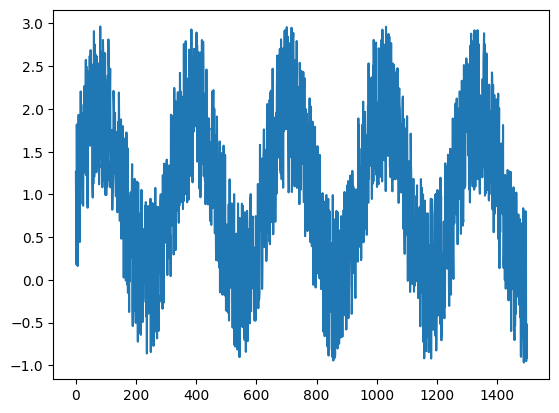

In [3]:
plt.plot(x)

In [4]:
train,test = x[0:1000],x[1000:]

In [5]:
def convert_data_extra(data,x_step,y_step):
  X,Y = [],[]
  for i in range(len(data)-x_step-y_step+1):
    d=i+x_step
    X.append(data[i:d])
    Y.append(data[d:d+y_step])

  return np.array(X),np.array(Y)

In [6]:
x_step=3
y_step=2
trainX,trainY=convert_data_extra(train,x_step,y_step)
testX,testY=convert_data_extra(test,x_step,y_step)

In [12]:
trainY.shape, trainX.shape, testY.shape, testX.shape

((996, 2), (996, 3), (496, 2), (496, 3))

In [13]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [14]:
trainX.shape,testX.shape

((996, 3, 1), (496, 3, 1))

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=64,activation='tanh',input_shape=(None,1)))
model.add(Dense(2))
model.compile(loss='mean_squared_error',optimizer='rmsprop')

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,354 (17.01 KB)

 Trainable params: 4,354 (17.01 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(trainX,trainY,epochs=100,batch_size=16)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6303
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4402
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4731
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4247
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4376
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4321
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4376
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4310
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4175
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4187
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4600
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4248
Epoch 13/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4269
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4187
Epoch 15/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4332
Epoc

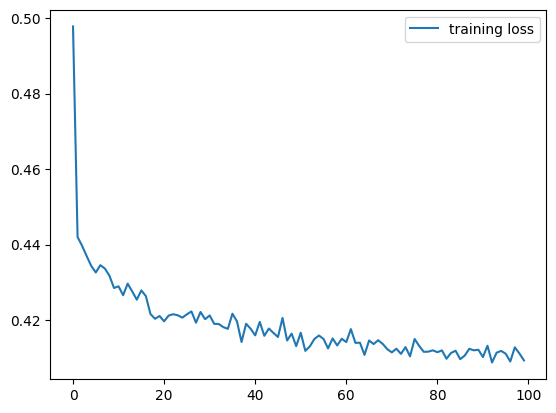

In [18]:
loss=history.history['loss']
plt.plot(loss,label='training loss')
plt.legend()

In [19]:
score=model.evaluate(trainX,trainY)
score

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3934  


0.403628408908844

In [20]:
train_preds=model.predict(trainX)
test_preds=model.predict(testX)
preds=np.concatenate((train_preds,test_preds),axis=0)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


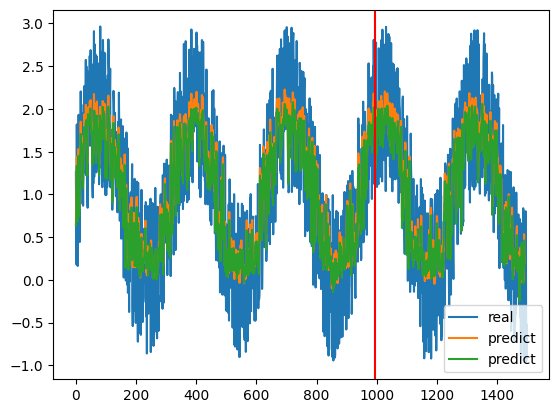

In [21]:
plt.plot(x,label='real')
plt.plot(preds,label='predict')
plt.legend()
plt.axvline(len(trainX),c='r')


In [28]:
trainX2,trainY2=convert_data_extra(train,10,1)
testX2,testY2=convert_data_extra(test,20,1)

In [29]:
trainY2.shape, trainX2.shape, testY2.shape, testX2.shape

((990, 1), (990, 10), (480, 1), (480, 20))

In [30]:
trainX2=np.reshape(trainX2,(trainX2.shape[0],trainX2.shape[1],1))
testX2=np.reshape(testX2,(testX2.shape[0],testX2.shape[1],1))

In [31]:
trainX2.shape,testX2.shape

((990, 10, 1), (480, 20, 1))

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

model2 = Sequential()
model2.add(SimpleRNN(units=64,activation='tanh',input_shape=(None,1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='rmsprop')

In [36]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history2 = model2.fit(trainX2,trainY2,epochs=100,batch_size=16)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6545
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3980
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4036
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3922
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3816
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3761
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3763
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3996
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3603
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3905
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3747
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3607
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3649
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3499
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3461
Epoc

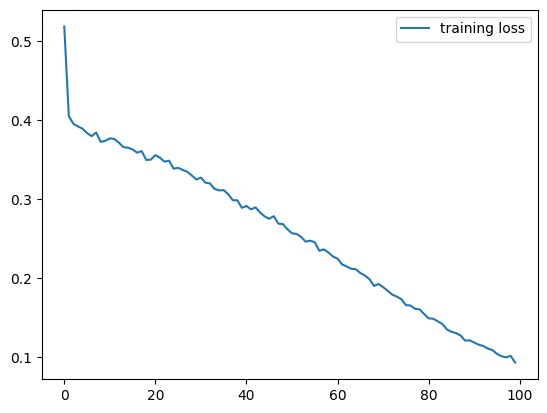

In [38]:
loss2=history2.history['loss']
plt.plot(loss2,label='training loss')
plt.legend()

In [39]:
score2=model2.evaluate(trainX2,trainY2)
score2

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0942 


0.08476943522691727

In [40]:
train_preds=model2.predict(trainX2)
test_preds=model2.predict(testX2)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


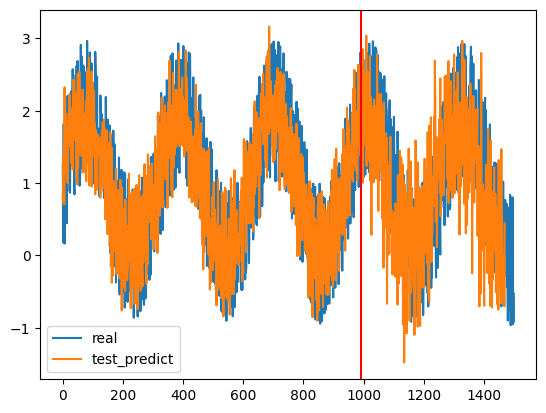

In [42]:
plt.plot(x,label='real')
preds=np.concatenate((train_preds,test_preds),axis=0)
plt.plot(preds,label='test_predict')
plt.legend()
plt.axvline(len(trainX2),c='r')

# 1-Application of simple RNN
Recurrent neural networks are a form of deep learning method that uses a sequential approach. We always assume that each input and output in a neural network is reliant on all other levels. Recurrent neural networks are so named because they perform mathematical computations in consecutive order.

## Types of RNN :
1. One-to-One RNN:
The above diagram represents the structure of the Vanilla Neural Network.  It is used to solve general machine learning problems that have only one input and output.
Example: classification of images.

2. One-to-Many RNN:
A single input and several outputs describe a one-to-many  Recurrent Neural Network. The above diagram is an example of this.
Example: The image is sent into Image Captioning, which generates a sentence of words.

3. Many-to-One RNN:
This RNN creates a single output from the given series of inputs. 
Example: Sentiment analysis is one of the examples of this type of network, in which a text is identified as expressing positive or negative feelings.

4. Many-to-Many RNN:
This RNN receives a set of inputs and produces a set of outputs.
Example: Machine Translation, in which the RNN scans any English text and then converts it to French.

# 2-Exploding Gradient Problem
The exploding gradient problem is a challenge encountered during the training of deep neural networks, particularly in the context of gradient-based optimization methods such as backpropagation. This issue occurs when the gradients of the network's loss with respect to the parameters (weights) become excessively large. The "explosion" of the gradient can lead to numerical instability and the inability of the network to converge to a suitable solution.

## Causes of Exploding Gradients
The root cause of exploding gradients can often be traced back to the network architecture and the choice of activation functions. In deep networks, when multiple layers have weights greater than 1, the gradients can grow exponentially as they propagate back through the network during training. This is exacerbated when using activation functions with outputs that are not bounded, such as the hyperbolic tangent or the sigmoid function.
Another contributing factor is the initialization of the network's weights. If the initial weights are too large, even a small gradient can be amplified through the layers, leading to very large updates during training.

## Consequences of Exploding Gradients
When gradients explode, the weight updates during training can become so large that they cause the learning algorithm to overshoot the minima of the loss function. This can result in model parameters diverging to infinity, causing the learning process to fail. The model may exhibit erratic behavior, with the loss becoming NaN (not a number) or Inf (infinity), and the model's predictions becoming meaningless.

## Detecting Exploding Gradients
Detecting exploding gradients can be done by monitoring the gradients or the updates during training. If the gradients or weight updates are several orders of magnitude larger than expected, it's likely that the network is experiencing the exploding gradient problem. Another indicator is the loss function showing unusually large fluctuations or becoming NaN.

## Solutions to the Exploding Gradient Problem
Several strategies can be employed to mitigate the exploding gradient problem:
Gradient Clipping: This technique involves setting a threshold value, and if the gradient exceeds this threshold, it is scaled down to keep it within a manageable range. This prevents any single update from being too large.
Weight Initialization: Using a proper weight initialization strategy, such as Xavier or He initialization, can help prevent gradients from becoming too large at the start of training.
Use of Batch Normalization:Batch normalization can help maintain the output of each layer within a certain range, reducing the risk of exploding gradients.
Change of Network Architecture: Simplifying the network architecture or using architectures that are less prone to exploding gradients, such as those with skip connections like ResNet, can be effective.
Proper Activation Functions:
Using activation functions that are less likely to produce large gradients, such as the ReLU function and its variants, can help control the gradient's magnitude.

# 3-Error propagation in RNN
When all the outputs are actually used by the network, the error is going to backpropagate through all vertical edges: to s[t+1] from o[t+1], to s[t] from o[t], ..., to s[0] from o[0]. In addition, all cells except for the last one receive the error from the subsequent cell: s[t] from s[t+1], s[t-1] from s[t], etc.

It's easy to notice that all cells s[0] ... s[t] receive two error messages and they are added up (hence the sum).

Now, the situation discussed by Denny Britz is that only o[t+1] is used by the network and all other outputs are ignored. This is equivalent to zero gradients flowing from o[t], o[t-1], ..., o[0]. Technically, the total gradient received in s[i] is still a sum, but it's the sum of one element (and a zero). Effectively, the error is going to be backpropagated like this:

o[t+1] -> s[t+1] -> s[t] -> s[t-1] -> ... -> s[0]